# Does Defense or Offense wins championships? (Data Science project)
### A comparison between offensive and defensive oriented NBA championship teams
#### Suthashan Tharmarajah (suthashan-001)


Introduction: 

    In basketball, there is a popular saying that 'defense wins championships'. How accuarate is this statement? On the contrary, there is also a popular saying in strategy stating that "The best defense is a good offense", suggesting that offense is superior to defense in the realms of strategy. Therefore if two teams were to compete in an NBA finals, which team would have a greater chance at winning the championship series cup? Is it the offensive-oriented team that focuses on scoring or a defensive-oriented team that focuses on mitigating opponent scoring? 
    
    We are going to conduct this experiment by doing a historical analysis of past NBA championship teams in comparison to the final opponent they versed in each final series. In each championship final series, the competing teams aim to be the first to secure four wins, with the maximum number of 7 possible games in the series. To avoid complexity, we are only going to look at each team's field goal percentage which reveals a team's total points allowed per game and a team's total points scored per game. 
    
    We are going to compare the winning team's statistics along side the losing team's statistics for each game in the finals series. There will be a total of 39 final series over the span of (1980 to 2019) to give us an accurate representation of what seperates the champions from their opponents. 



**Before we start, we defines championship team and how we measure a team's defense and offensive abilites**


##### How do we measure a championship team?

    1) We measure the championship team by the number of games they won in the series. The winning team must have a total of 4 wins for that year. All the teams in the championsdata.csv file, are categorized as champions. The losing teams in the runnerupsdata.csv file are categorized as runner ups.

    2) There is also something called a "sweep" in basketball. This is where a team wins 4-0 where the Champion Team wins all 4 games in a row. Could it be that an offensive oriented team had a lucky scoring game where all their shots were falling leading to a 4-0 win?

    * Sweeps are going to be considered high priority when considering what makes a championship team in this research, due to their difficulty of scoring 4 wins in a row. Only the best championship teams can pull this result.

        
*There are limitations in this research as we are not going to consider player injuries which do have a huge impact on a championship series as player injuries are often random and cannot be predicted. Therefore we are going to assume that all the players are healthy to get a general idea of what creates a championship team.Furthermore we are going to consider points scored and field goal % as the highest priority stat when it comes to determining a team's defense and offense ability*
    

##### What defines a defense oriented team?

    These are the metrics that I will use in this experiment to classify a defensive-oriented team

    1) points allowed per game 

        - sum up the total number of points scored by the [opposing team] and divide the sum by the total number of games played in the series.
        this number will give you a measure of your *team's defensive effectiveness*. 
        
        The lower the number, the greater the defense played by the other team.



##### What defines a offense oriented team? 

    1) Points scored per game

        sum up the total number of points that [your team] scored and divide the sum by the total number of games played in the series.
        this number you a measure of your team's offensive effectiveness. A High number of points indicates good offense.

        
  

# Method
### Data Collection

this data about the nba championship series can be obtained at [Rdatasets] "https://www.kaggle.com/datasets/daverosenman/nba-finals-team-stats", a free online resource for datasets

In [2562]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2563]:
# load data

champions = pd.read_csv("./championsdata.csv")

In [2564]:
runnerups = pd.read_csv("./runnerupsdata.csv")

In [2565]:
# clean up the data columns so they are easily readible
champions.columns = ['Year', 'Team', 'Game', 'Win', 'Home', 'Minutes Played', 'FG', 'FGA', 'FG%', '3PTS', '3PT Attempts', '3PT%', 'FT', 'FTA', 'FT%','ORB', 'DRB', 'Total RB', 'AST', 'STL', 'BLK', 'TOV', 'Personal Fouls', 'PTS']

In [2566]:
display(champions)

,Year,Team,Game,Win,Home,Minutes Played,FG,FGA,FG%,3PTS,...,FT%,ORB,DRB,Total RB,AST,STL,BLK,TOV,Personal Fouls,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
1,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2017,Warriors,5,1,1,240,46,90,0.511,14,...,0.821,13,29,42,27,8,2,13,24,129
216,2018,Warriors,1,1,1,265,46,90,0.511,13,...,0.950,4,34,38,31,10,6,7,18,124
217,2018,Warriors,2,1,1,240,47,82,0.573,15,...,0.619,7,34,41,28,3,8,12,25,122
218,2018,Warriors,3,1,0,240,42,81,0.519,9,...,0.895,6,31,37,27,6,5,10,20,110


In [2567]:
runnerups.columns = ['Year', 'Team', 'Game', 'Win', 'Home', 'Minutes Played', 'FG', 'FGA', 'FG%', '3PTS', '3PT Attempts', '3PT%', 'FT', 'FTA', 'FT%','ORB', 'DRB', 'Total RB', 'AST', 'STL', 'BLK', 'TOV', 'Personal Fouls', 'PTS']
display(runnerups)

,Year,Team,Game,Win,Home,Minutes Played,FG,FGA,FG%,3PTS,...,FT%,ORB,DRB,Total RB,AST,STL,BLK,TOV,Personal Fouls,PTS
0,1980,Sixers,1,0,0,240,40,90,0.444,0,...,0.786,14,26,40,28,12,13,14,17,102
1,1980,Sixers,2,1,0,240,43,85,0.506,0,...,0.778,5,29,34,34,14,11,20,21,107
2,1980,Sixers,3,0,1,240,45,93,0.484,1,...,0.588,13,24,37,34,12,8,13,25,101
3,1980,Sixers,4,1,1,240,41,79,0.519,0,...,0.885,5,29,34,31,5,10,14,20,105
4,1980,Sixers,5,0,0,240,42,94,0.447,0,...,0.792,13,29,42,32,9,7,12,25,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2017,Cavaliers,5,0,0,240,47,88,0.534,11,...,0.652,12,28,40,22,6,5,14,22,120
216,2018,Cavaliers,1,0,0,265,44,99,0.444,10,...,0.727,19,34,53,18,5,3,11,18,114
217,2018,Cavaliers,2,0,0,240,37,90,0.411,9,...,0.769,16,26,42,25,9,4,10,15,103
218,2018,Cavaliers,3,0,1,240,40,92,0.435,9,...,0.765,15,32,47,20,6,4,13,18,102


## Prepare data 
#### Instead of each individual game, I want each individual series grouped by year

To avoid confusion I first focused on the logic of one year (test case being 1980 Lakers) which can be seen at the very end of the page, then I implemented the logic into the loop for all the years in the dataset

main_df is the main dataframe that we are going to use, 

In [2568]:

# Looping through the entire dataset and remodeling data 
year = 1980
main_df = pd.DataFrame(columns=['Year', 'Team', '#Games', 'Status', 'FG%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'PTS', 'OR'])


while(year < 2019):
    champions_team = champions[champions['Year'] == year]
    runnerups_team = runnerups[runnerups['Year'] == year]
    
    orientation_teamA = ''
    orientation_teamB = ''
    
    # We are going to use FG% and opponent FG% to figure out which team is defensively oriented and which team is offensively oriented relative to each other.
    if((champions_team['FG%'].sum()/totalGames).round(3) > (runnerups_team['FG%'].sum()/totalGames).round(3)):
        orientation_teamA = 'd'
        orientation_teamB = 'o'
    else:
        orientation_teamA = 'o'
        orientation_teamB = 'd'
    
    loop_yearValue = champions_team['Year'].iloc[0] # get the first value from the year column
    loop_teamName = champions_team['Team'].iloc[0] 
    loop_totalGames = champions_team['Game'].iloc[-1]
    loop_total_fgperc = (champions_team['FG%'].sum()/totalGames).round(3)
    loop_totalOffReb = champions_team['ORB'].sum()
    loop_totalDefReb = champions_team['DRB'].sum()
    loop_totalAssit = champions_team['AST'].sum()
    loop_totalSteal = champions_team['STL'].sum()
    loop_totalBlock = champions_team['BLK'].sum()
    loop_totalPts = champions_team['PTS'].sum()
    
    newRow = pd.DataFrame({'Year': loop_yearValue, 'Team' : loop_teamName, '#Games' : loop_totalGames, 'Status' : 'Champs', 'FG%' : loop_total_fgperc, 'ORB' : loop_totalOffReb, 'DRB' : loop_totalDefReb, 'AST' : loop_totalAssit, 'STL' : loop_totalSteal, 'BLK' : loop_totalBlock, 'PTS' : loop_totalPts, 'OR' : orientation_teamA}, index=[0])
    #concat new row
    main_df =  pd.concat([main_df, newRow])
    
    
    # add the runner up team
    loop_yearValue_a = runnerups_team['Year'].iloc[0] # get the first value from the year column
    loop_teamName_a = runnerups_team['Team'].iloc[0] 
    loop_totalGames_a = runnerups_team['Game'].iloc[-1]
    loop_total_fgperc_a = (runnerups_team['FG%'].sum()/totalGames).round(3)
    loop_totalOffReb_a = runnerups_team['ORB'].sum()
    loop_totalDefReb_a = runnerups_team['DRB'].sum()
    loop_totalAssit_a = runnerups_team['AST'].sum()
    loop_totalSteal_a = runnerups_team['STL'].sum()
    loop_totalBlock_a = runnerups_team['BLK'].sum()
    loop_totalPts_a = runnerups_team['PTS'].sum()
    
    
    newRow_b = pd.DataFrame({'Year': loop_yearValue_a, 'Team' : loop_teamName_a, '#Games' : loop_totalGames_a, 'Status' : 'Run Up', 'FG%' : loop_total_fgperc_a, 'ORB' : loop_totalOffReb_a, 'DRB' : loop_totalDefReb_a, 'AST' : loop_totalAssit_a, 'STL' : loop_totalSteal_a, 'BLK' : loop_totalBlock_a, 'PTS' : loop_totalPts_a, 'OR': orientation_teamB}, index=[0])
    main_df = pd.concat([main_df, newRow_b])
    
    # Increment loop counter
    year += 1
    

print(main_df)


    Year       Team #Games  Status    FG%  ORB  DRB  AST STL BLK  PTS OR
0   1980     Lakers      6  Champs  0.489  103  205  160  55  37  657  d
0   1980     Sixers      6  Run Up  0.488   57  166  186  56  60  625  o
0   1981    Celtics      6  Champs  0.474  100  184  137  40  32  579  d
0   1981    Rockets      6  Run Up  0.377  112  144  108  47  34  520  o
0   1982     Lakers      6  Champs  0.495  110  174  188  64  42  674  o
..   ...        ...    ...     ...    ...  ...  ...  ...  ..  ..  ... ..
0   2016   Warriors      7  Run Up  0.503   72  207  158  46  40  699  o
0   2017   Warriors      5  Champs  0.397   61  168  147  38  22  608  d
0   2017  Cavaliers      5  Run Up  0.384   58  160  108  36  18  574  o
0   2018   Warriors      4  Champs  0.343   27  133  111  26  32  464  d
0   2018  Cavaliers      4  Run Up  0.272   67  119   84  25  16  404  o

[78 rows x 12 columns]


With the dataframe above I want to only select the Champs and count the number of defense vs offense champs in history

In [2569]:
#filter for only Champs
champ_main_df = main_df[main_df['Status'] == 'Champs']

#Count how many are defense oriented 
defense_champ_count = champ_main_df[champ_main_df['OR'] == 'd'].shape[0]
offense_champ_count = champ_main_df[champ_main_df['OR'] == 'o'].shape[0]
print("Number of Defensive-Oriented Champions:  ", defense_champ_count)
print("Number of Offensive-Oriented Champions:  ", offense_champ_count)
group_by_or_status = champ_main_df.groupby(['OR', 'Status']).size().unstack()
group_by_or_status

Number of Defensive-Oriented Champions:   29
Number of Offensive-Oriented Champions:   10


Status,Champs
OR,
d,29
o,10


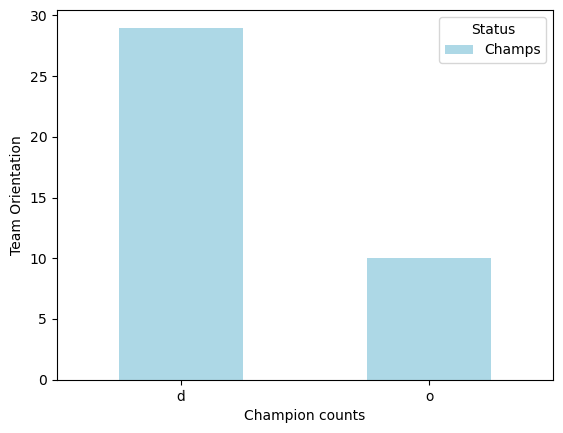

In [2570]:
#matplotlib
group_by_or_status_barplot = group_by_or_status.plot.bar(stacked=False, color=["lightblue"])
plt.xlabel('Champion counts')
plt.ylabel('Team Orientation')
plt.xticks(rotation=1)
plt.show(group_by_or_status_barplot)

The above data proves that statement Defense wins championships as almost 3/4 of championship teams have been defensive oriented. From the bar graph it shows that roughtly 1/4 of total champions are offense oriented. This data shows that if two teams were to face of against each other in the finals, the defensive-oriented team will have a 74.3% (29/39) chance of being the winner.

In [2571]:
#Grouping the offensive oriented teams into their own dataframe to find cool patterns
off_or = champ_main_df[champ_main_df['OR'] == 'o']
group_by_year_team = off_or.groupby(['Year','PTS','Team']).size().unstack()


print("Min points scored by an offensive championship team: ", off_or['PTS'].min())
print("Min points scored by an offensive championship team: ", off_or['PTS'].max())

group_by_year_team

Min points scored by an offensive championship team:  528
Min points scored by an offensive championship team:  812


,Team,Bulls,Celtics,Heat,Lakers,Mavericks,Pistons,Spurs
Year,PTS,,,,,,,
1982,674,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1984,812,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1988,691,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1990,535,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1996,558,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1998,528,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2005,594,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010,634,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2011,568,NaN,NaN,NaN,NaN,1.0,NaN,NaN


From this we can see a huge difference from the total points scored between the offensive oriented teams. There is a 284 pt difference between the best offensive championship team and worst offensive champions team in terms of points scored. There is also a 121 pt difference between first and second place in terms of scoring.

The reason the Celetics in 1984 had a huge offensive performance was due to a player named Larry Bird. "Bird was named Finals MVP averaging 27.4 points, 14 rebounds, and 3.6 assists per game. Bird recorded 48 points in a single game in a 128–127 win over the Atlanta Hawks on December 9, 1984.

In [2572]:
#here we are looking at the defensive rebounding which is another popular stat when used to determine a teams defensive ability
group_by_DRB = off_or.groupby(['Year','DRB','Team']).size().unstack()
group_by_DRB

,Team,Bulls,Celtics,Heat,Lakers,Mavericks,Pistons,Spurs
Year,DRB,,,,,,,
1982,174,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1984,210,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1988,191,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1990,145,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1996,144,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1998,153,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2005,206,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010,205,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2011,171,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [2573]:
# Now we are going to compare the defensive rebounds between the offensive oriented champions and the defensive oriented champions

#find the mean value of defensive rebounds for the defensive oriented teams

# Defense Oriented Champions
dff_or = champ_main_df[champ_main_df['OR'] == 'd']
mean_drb = dff_or['DRB'].mean().round(2)
max_drb = dff_or['DRB'].max()

print("Defensive-Oriented teams average rebounding: ",  mean_drb)
print("Defensive-Oriented teams max rebounding: ",  max_drb)

Defensive-Oriented teams average rebounding:  168.03
Defensive-Oriented teams max rebounding:  225


An interesting find, The 1984 Celtics led in defensive rebounding amoung the offensive-oriented championship teams, surpassing even the defensive-oriented champions. With the 1984 Celtics having 210 defensive rebounding, they surpassed the average of 168 defensive rebounds by defensive championship teams with a margin of 42 rebounds which is insane. They were only 15 rebounds away from tieing with the best defensive rebounding championship team. These stats highlight the strength of the 1984 Celtics, Having the best offense with solid defense. 

Takeaway from these stats, From now on, whenever I play NBA 2k which is a basketball video game, I will always choose the 1984 Celtics team to have the best win ratio :)

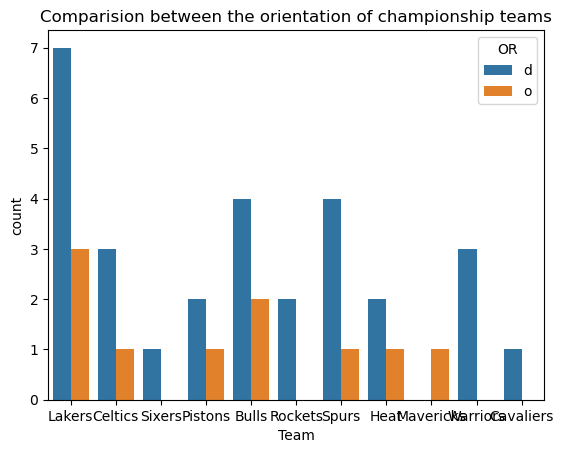

In [2574]:
p = sns.countplot(data=champ_main_df, x='Team', hue='OR').set(title="Comparision between the orientation of championship teams")

What is interesting is that the Celtics have been mostly a defensive-oriented team throughout history. This explains the reason why the 1984 Celtics ranked high in defensive rebounding.

### Seeing the championship teams that won with a sweep (4-0), what was their orientation?

In [2575]:
sweep = champ_main_df[champ_main_df['#Games'] == 4]
print(sweep)

   Year      Team #Games  Status    FG% ORB  DRB  AST STL BLK  PTS OR
0  1983    Sixers      4  Champs  0.325  72  120  104  44  32  442  d
0  1989   Pistons      4  Champs  0.350  45  115   97  16  21  436  d
0  1995   Rockets      4  Champs  0.316  44  129  105  40  20  456  d
0  2002    Lakers      4  Champs  0.337  43  133   92  28  28  424  d
0  2007     Spurs      4  Champs  0.295  43  132   67  24  15  346  d
0  2018  Warriors      4  Champs  0.343  27  133  111  26  32  464  d


* Sweeps are going to be considered high priority when considering what makes a championship team in this research, due to their difficulty of scoring 4 wins in a row .Only the best championship teams can pull this result*

I predicted that all the sweeps will come from mostly offensive oriented teams, as these teams might have lucky shooting games causing a 4-0 win. However I was wrong as 100% of sweeps came frome defensive oriented teams.

# Conclusion

  Defense wins championships, as 74.3% (29/39) of championship teams have been defensive oriented. This data shows that if two teams were to face of against each other in the finals, the defensive-oriented team will have a 74.3% chance of being the winner. All the sweeps (4-0) wins in the final series have been defensive oriented teams. This proves that defensive truely wins championships.

<h3 color=#000000> Below is test logic I did with the year 1980 before I implemented logic into loop (intermidiate step)</h3>

In [2576]:
#test logic with one year
#select the first year game
champions_1980 = champions[champions['Year'] == 1980]
runnerups_1980 = runnerups[runnerups['Year'] == 1980]
print(champions_1980.shape)

(6, 24)


In [2577]:
print(runnerups_1980)

   Year    Team  Game  Win  Home  Minutes Played  FG  FGA    FG%  3PTS  ...  \
0  1980  Sixers     1    0     0             240  40   90  0.444     0  ...   
1  1980  Sixers     2    1     0             240  43   85  0.506     0  ...   
2  1980  Sixers     3    0     1             240  45   93  0.484     1  ...   
3  1980  Sixers     4    1     1             240  41   79  0.519     0  ...   
4  1980  Sixers     5    0     0             240  42   94  0.447     0  ...   
5  1980  Sixers     6    0     1             240  47   89  0.528     0  ...   

     FT%  ORB  DRB  Total RB  AST  STL  BLK  TOV  Personal Fouls  PTS  
0  0.786   14   26        40   28   12   13   14              17  102  
1  0.778    5   29        34   34   14   11   20              21  107  
2  0.588   13   24        37   34   12    8   13              25  101  
3  0.885    5   29        34   31    5   10   14              20  105  
4  0.792   13   29        42   32    9    7   12              25  103  
5  0.591    7 

In [2578]:
#Trim the dataframe (I dont need all the games in the series, I just need the total values of each game)

champ_df = pd.DataFrame(columns=['Year', 'Team', '#Games', 'Status', 'FG%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'PTS'])

yearValue = champions_1980['Year'].iloc[0] # get the first value from the year column
teamName = champions_1980['Team'].iloc[0] 
totalGames = champions_1980['Game'].iloc[-1]
total_fgperc = (champions_1980['FG%'].sum()/totalGames).round(3)
totalOffReb = champions_1980['ORB'].sum()
totalDefReb = champions_1980['DRB'].sum()
totalAssit = champions_1980['AST'].sum()
totalSteal = champions_1980['STL'].sum()
totalBlock = champions_1980['BLK'].sum()
totalPts = champions_1980['PTS'].sum()

newRow = pd.DataFrame({'Year': yearValue, 'Team' : teamName, '#Games' : totalGames, 'Status' : 'Champs', 'FG%' : total_fgperc, 'ORB' : totalOffReb, 'DRB' : totalDefReb, 'AST' : totalAssit, 'STL' : totalSteal, 'BLK' : totalBlock, 'PTS' : totalPts}, index=[0])

#concat new row
champ_df = pd.concat([champ_df, newRow])

print(champ_df)

   Year    Team #Games  Status    FG%  ORB  DRB  AST STL BLK  PTS
0  1980  Lakers      6  Champs  0.489  103  205  160  55  37  657
